In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [1]:
#1. 데이터 생성

In [21]:
statement = pd.read_csv('data/XOM_statement.csv')

In [22]:
XOM_price = pd.read_csv('data/XOM_price.csv')

In [2]:
#1.1 각데이터 확인

In [23]:
XOM_price['Date']

0       2007-01-03
1       2007-01-04
2       2007-01-05
3       2007-01-08
4       2007-01-09
           ...    
3643    2021-06-23
3644    2021-06-24
3645    2021-06-25
3646    2021-06-28
3647    2021-06-29
Name: Date, Length: 3648, dtype: object

In [24]:
statement['Date']

0     21.03/31
1     20.12/31
2     20.09/30
3     20.06/30
4     20.03/31
5     19.12/31
6     19.09/30
7     19.06/30
8     19.03/31
9     18.12/31
10    18.09/30
11    18.06/30
12    18.03/31
13    17.12/31
14    17.09/30
15    17.06/30
16    17.03/31
17    16.12/31
18    16.09/30
19    16.06/30
20    16.03/31
21    15.12/31
22    15.09/30
23    15.06/30
24    15.03/31
25    14.12/31
26    14.09/30
27    14.06/30
28    14.03/31
29    13.12/31
30    13.09/30
31    13.06/30
32    13.03/31
33    12.12/31
34    12.09/30
35    12.06/30
36    12.03/31
37    11.12/31
38    11.09/30
39    11.06/30
40    11.03/31
Name: Date, dtype: object

In [11]:
#1.2 key 값이 될 Date의 형식이 다름을 확인 -> 주가 데이터와 맞게 수정

In [25]:
statement['Date'] = statement['Date'].str.replace('.','/')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [26]:
statement['Date'] = statement['Date'].str.replace('/','-')

In [27]:
statement['Date']='20'+statement['Date']

In [28]:
XOM_price['Date']

0       2007-01-03
1       2007-01-04
2       2007-01-05
3       2007-01-08
4       2007-01-09
           ...    
3643    2021-06-23
3644    2021-06-24
3645    2021-06-25
3646    2021-06-28
3647    2021-06-29
Name: Date, Length: 3648, dtype: object

In [29]:
XOM_price['Date'].str.slice(5,7)

0       01
1       01
2       01
3       01
4       01
        ..
3643    06
3644    06
3645    06
3646    06
3647    06
Name: Date, Length: 3648, dtype: object

In [12]:
#1.3 분기별로 볼 파생변수 생성

In [31]:
XOM_price['Q']= np.where(XOM_price['Date'].str.slice(5,7).astype('int64') <= 3, XOM_price['Date'].str.slice(0,5)+'1Q',
        np.where(XOM_price['Date'].str.slice(5,7).astype('int64') <= 6, XOM_price['Date'].str.slice(0,5)+'2Q',
                np.where(XOM_price['Date'].str.slice(5,7).astype('int64') <= 9, XOM_price['Date'].str.slice(0,5)+'3Q',XOM_price['Date'].str.slice(0,5)+'4Q')))

In [32]:
statement['Q']= np.where(statement['Date'].str.slice(5,7).astype('int64') <= 3, statement['Date'].str.slice(0,5)+'1Q',
                np.where(statement['Date'].str.slice(5,7).astype('int64') <= 6, statement['Date'].str.slice(0,5)+'2Q',
                np.where(statement['Date'].str.slice(5,7).astype('int64') <= 9, statement['Date'].str.slice(0,5)+'3Q',statement['Date'].str.slice(0,5)+'4Q')))

In [33]:
XOM_price['Q'] 

0       2007-1Q
1       2007-1Q
2       2007-1Q
3       2007-1Q
4       2007-1Q
         ...   
3643    2021-2Q
3644    2021-2Q
3645    2021-2Q
3646    2021-2Q
3647    2021-2Q
Name: Q, Length: 3648, dtype: object

In [13]:
#1.4 주가(분기별 평균) + 재무재표 (분기별) 분기 기준 병합

In [61]:
XOM_price.groupby('Q').mean().shape

(58, 6)

In [34]:
Statement_XOM = pd.merge(XOM_price.groupby('Q').mean().reset_index(),statement,on = 'Q')

In [14]:
#2 데이터 확인

In [15]:
#2.1 사용할 데이터 (재무제표 변수들중) - 재무제표를 통해 기업 분석하는 3가지 관점

In [35]:
H4_data = Statement_XOM[['Q','Close','부채총계', '자산총계', '순이익', '매출액']]

In [36]:
Statement_XOM.columns

Index(['Q', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       '매출액', '매출원가', '매출총이익', '판매관리비', '연구개발비', '영업이익', 'EBITDA', '법인세',
       '중단손익', '순이익', '현금성자산', '단기투자', '매출채권등', '재고자산', '장기투자', '유형자산', '무형자산',
       '이연세자산', '기타자산', '자산총계', '매입채무등', '단기차입금', '장기차입금', '이연수익', '이연세부채',
       '기타부채', '부채총계', '이익잉여금', '기타포괄익', '자본총계', '영업활동', '투자활동', '재무활동',
       '환율변동', '현금의증감', '자본적지출', '잉여현금', 'ROI'],
      dtype='object')

In [17]:
# 2.2 수치 데이터중 ,로 인해 object형식인것들 수정

In [37]:
H4_data['부채총계'] = H4_data['부채총계'].str.replace(',','').astype('int64')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
H4_data['매출액'] = H4_data['매출액'].str.replace(',','').astype('int64')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
# 2.3 파생변수 추가

In [48]:
H4_data['부채비율'] = H4_data['부채총계']/H4_data['자산총계']

In [48]:
H4_data['자기자본이익률'] = H4_data['순이익']/H4_data['자산총계']

In [48]:
H4_data['매출순이익률'] = H4_data['순이익']/H4_data['매출액']

In [19]:
#. 3 데이터확인

In [62]:
H4_data.shape

(41, 11)

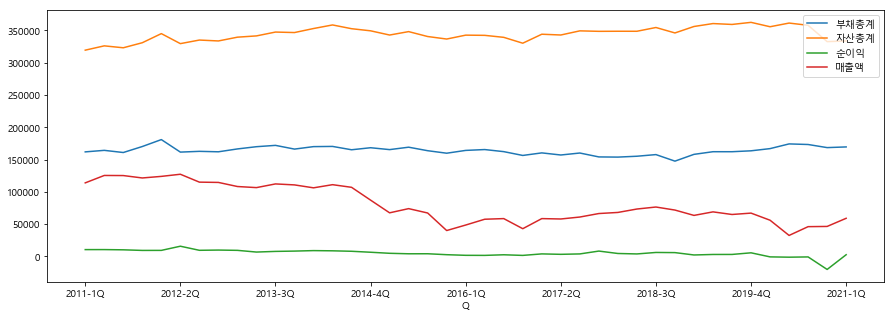

In [51]:
H4_data[['Q','부채총계','자산총계','순이익','매출액']].plot.line(x = 'Q',figsize = (15,5))

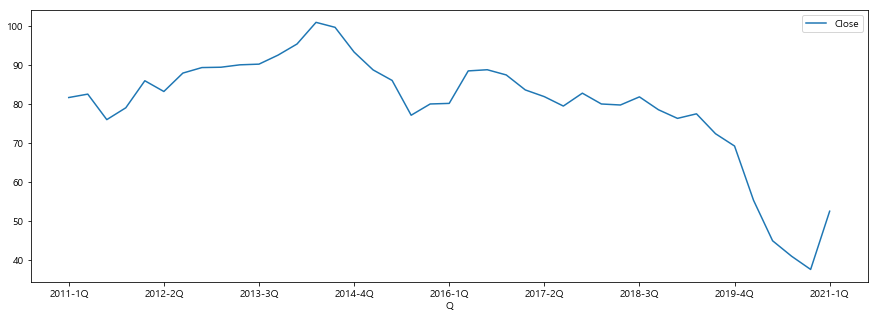

In [54]:
H4_data[['Q','Close']].plot.line(x = 'Q',figsize = (15,5))

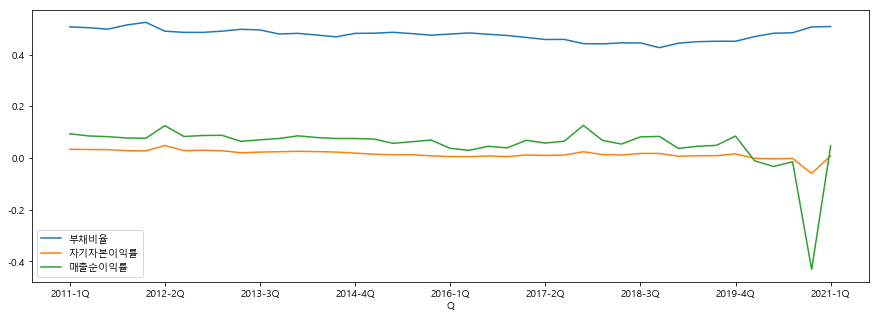

In [52]:
H4_data[['Q','부채비율','자기자본이익률','매출순이익률']].plot.line(x = 'Q',figsize = (15,5))

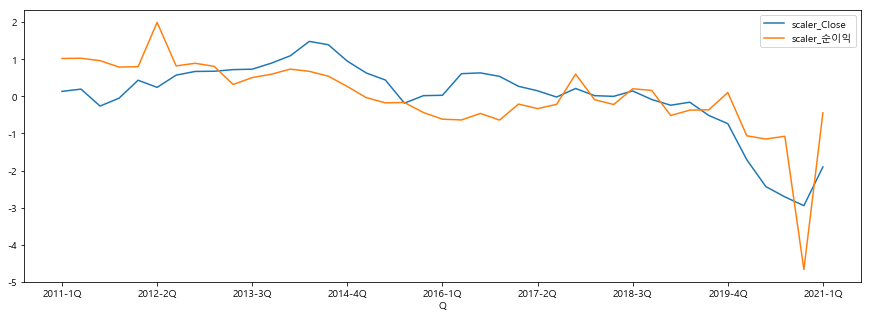

In [58]:
H4_data[['Q','scaler_Close','scaler_순이익']].plot.line(x = 'Q',figsize = (15,5))

In [55]:
column = ['Close','순이익']

In [56]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   
for i in column:
    H4_data['scaler_'+i] = scaler.fit_transform(H4_data[i].values.reshape(-1,1))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

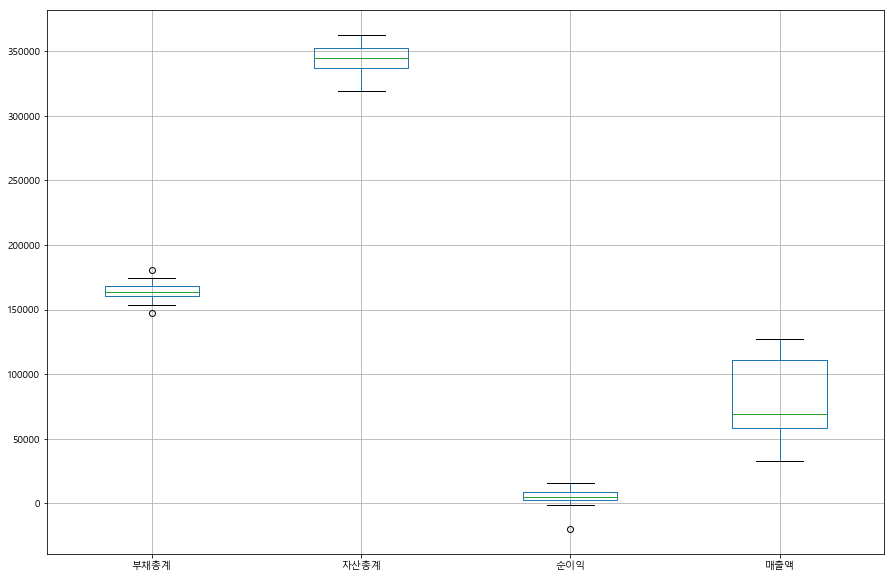

In [115]:
H4_data[['부채총계','자산총계','순이익','매출액']].boxplot(figsize = (15,10))

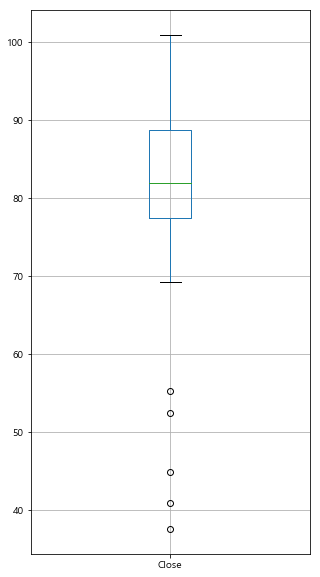

In [77]:
H4_data[['Close']].boxplot(figsize=(5,10))

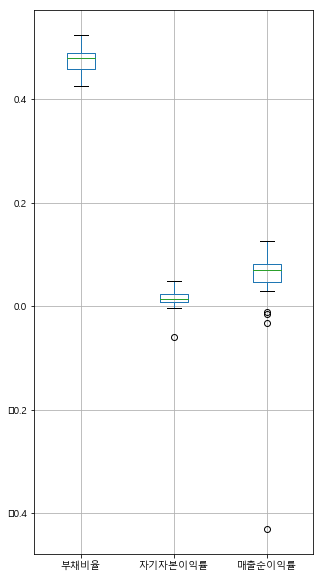

In [78]:
H4_data[['부채비율','자기자본이익률','매출순이익률']].boxplot(figsize=(5,10))

In [80]:
stats.pearsonr(H4_data['Close'],H4_data['매출액'])

(0.5377566841466711, 0.00028790103389410835)

In [81]:
stats.pearsonr(H4_data['Close'],H4_data['부채비율'])

(-0.060427191514533726, 0.7074370902297735)

In [65]:
#4. 연관관계 분석

In [67]:
target_list = list(H4_data.columns.values)

In [76]:
target_list = target_list[:-2]

EOM의 종가와 부채총계 의 상관관계
(-0.1572791734550756, 0.3260685004812921)
EOM의 종가와 자산총계 의 상관관계
(-0.11074105871035282, 0.4906441678851343)
EOM의 종가와 순이익 의 상관관계
(0.6788101445653428, 1.0705602414397635e-06)
EOM의 종가와 매출액 의 상관관계
(0.5377566841466711, 0.00028790103389410835)
EOM의 종가와 부채비율 의 상관관계
(-0.060427191514533726, 0.7074370902297735)
EOM의 종가와 자기자본이익률 의 상관관계
(0.6642159754827678, 2.190393890994093e-06)
EOM의 종가와 매출순이익률 의 상관관계
(0.6502410253203148, 4.1951981760783025e-06)


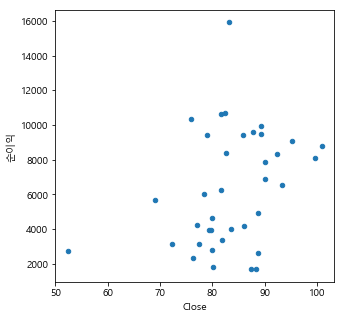

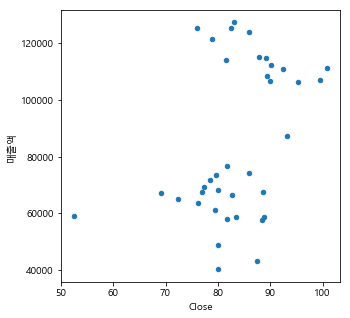

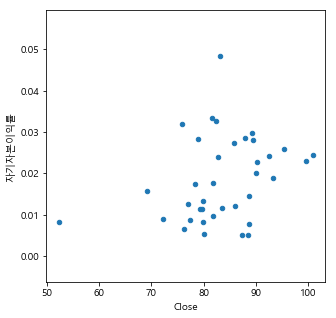

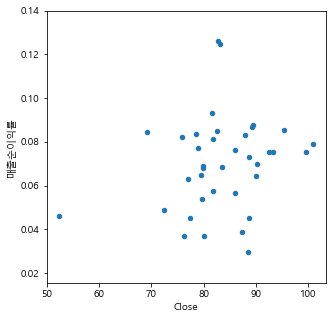

In [79]:
for i in target_list:
    coff_result = stats.pearsonr(H4_data['Close'],H4_data[i])
    print('EOM의 종가와',i,'의 상관관계')
    print(coff_result)
    if coff_result[1]<0.05:
        H4_data.loc[H4_data.순이익>0][['Close',i]].plot.scatter(x = 'Close', y = i,figsize = (5,5))

In [80]:
#5. 순이익이 0이상인지점 따로보기

In [98]:
H4_data.loc[H4_data.순이익>0]

,Q,Close,부채총계,자산총계,순이익,매출액,부채비율,자기자본이익률,매출순이익률
0,2011-1Q,81.590484,162002,319533,10650,114004,0.506996,0.033330,0.093418
1,2011-2Q,82.464603,164369,326204,10680,125486,0.503884,0.032740,0.085109
2,2011-3Q,75.921406,161015,323227,10330,125330,0.498148,0.031959,0.082422
3,2011-4Q,78.962381,170308,331052,9400,121609,0.514445,0.028394,0.077297
4,2012-1Q,85.893549,181035,345152,9450,124053,0.524508,0.027379,0.076177
5,2012-2Q,83.138571,161660,329645,15910,127363,0.490406,0.048264,0.124919
6,2012-3Q,87.861429,162836,335191,9570,115141,0.485801,0.028551,0.083115
7,2012-4Q,89.276774,162135,333795,9950,114699,0.485732,0.029809,0.086749
8,2013-1Q,89.363333,166562,339639,9500,108357,0.490409,0.027971,0.087673
9,2013-2Q,89.980312,170027,341615,6860,106666,0.497715,0.020081,0.064313


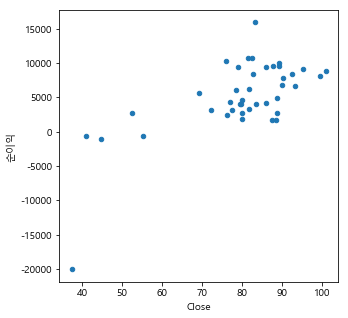

In [92]:
H4_data[['Close','순이익']].plot.scatter(x = 'Close', y = '순이익',figsize = (5,5))

In [69]:
H4_data.describe()

,Close,부채총계,자산총계,순이익,매출액,부채비율,자기자본이익률,매출순이익률
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,79.649804,164099.390244,344424.902439,5127.073171,80863.487805,0.476851,0.014996,0.051463
std,14.478118,6378.462577,10884.187209,5463.737843,28647.461065,0.022555,0.016373,0.083385
min,37.493281,147668.000000,319533.000000,-20070.000000,32605.000000,0.426545,-0.060316,-0.431242
25%,77.411269,160438.000000,336758.000000,2780.000000,58677.000000,0.458548,0.008255,0.046156
50%,81.818572,163823.000000,345152.000000,4940.000000,69091.000000,0.480896,0.014404,0.069201
75%,88.674591,168620.000000,352764.000000,8780.000000,110860.000000,0.490406,0.024485,0.082422
max,100.873492,181035.000000,362597.000000,15910.000000,127363.000000,0.524508,0.048264,0.125987


In [81]:
# 6. 코로나변수 집어넣어보기

In [119]:
H4_data['Corona'] = 0

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
H4_data.loc[36:,'Corona'] = 1

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [82]:
# 7. H4 데이터 저장

In [18]:
H4_data.to_csv('data/H4_data')